# Basic Metropolis-Hastings

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Base chain

Consider a Markov Chain that moves left/right with equal probability:

In [2]:
def base_chain(current_state):
    move = np.random.choice([-1,1])
    return current_state + move

current = 0
for t in range(20):
    print(current, end=" -> ")
    current = base_chain(current)

0 -> 1 -> 2 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 10 -> 11 -> 10 -> 9 -> 

### Target stationary distribution

We now wish to construct another chain with stationary distribution
given by the following mixture

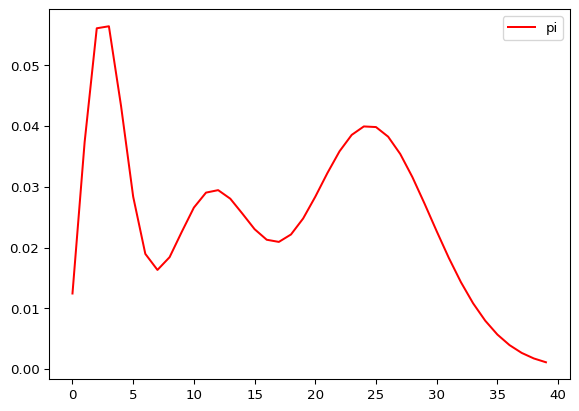

In [3]:
from scipy.stats import poisson

def mixture(n):
    return 0.25 * poisson.pmf(n, mu=3.0, loc=0) \
            + 0.25 * poisson.pmf(n, mu=12.0, loc=0) \
            + 0.5 * poisson.pmf(n, mu=25, loc=0)

plt.plot([n for n in range(0, 40)],
         [mixture(n) for n in range(0, 40)], c='red', label='pi')
plt.legend()

### Metropolis-Hastings, acceptance probability

Since the base chain is symmetric (with transitions
$\psi(x,x\pm1)=1/2$), the Metropolis scheme is defined as follows:

Given $x_t$,

-   Sample $y_{t+1}$ according to $\psi(x_t, \cdot)$,
-   Either
    -   Accept the move ($x_{t+1}=y_{t+1}$) with probability
        $a(x_t,y_t)=\min\{1, \pi(x)/\pi(y) \},$  
        or  
    -   Reject the move $(x_{t+1}=x_t$) with probability
        $1-a(x_t,y_{t+1})$.

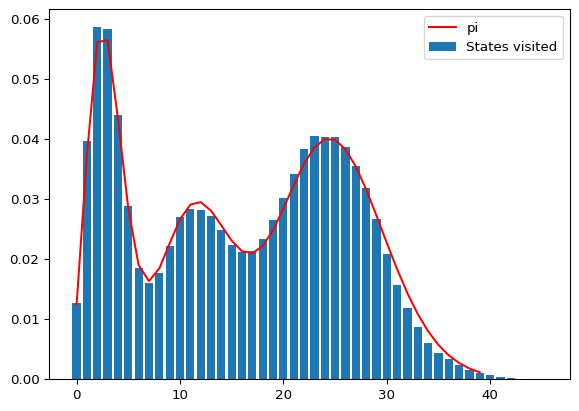

In [4]:
current = 0
states_visited = []
for t in range(100000):
    proposal = base_chain(current)
    U = np.random.uniform()
    a = mixture(proposal) / mixture(current)
    current = proposal if U <= a else current
    states_visited.append(current)
    
# Counting states visited by the metropolis chain
states, counts = np.unique(states_visited, return_counts=True)
plt.bar(states, counts/len(states_visited), label='States visited')

# theoretical target distribution
plt.plot([n for n in range(0, 40)],
         [mixture(n) for n in range(0, 40)], c='red', label='pi')
plt.legend()